In [1]:
import numpy as np


def f(x):
    return x**2  # Objective function


def df(x):
    return 2 * x  # Gradient


epsilon = 0.01  # Convergence threshold
alpha = 0.4  # Learning rate

# Initialization
x = 10
x_last = np.inf * np.ones_like(x)
print("Initialize: x =", x)
print("")

# Start gradient descent
iters = 0
while abs(f(x) - f(x_last)) > epsilon:
    x_last = x
    x = x - alpha * df(x)  # Fixed indentation
    iters += 1
    print("==> Iter %s, x=%s, f(x)=%s" % (iters, x, f(x)))

print("------------- The model is converged -------------")

print("\nOptimal solution = ", x)
print("Minimum f(x) = x^2 = ", f(x))

Initialize: x = 10

==> Iter 1, x=2.0, f(x)=4.0
==> Iter 2, x=0.3999999999999999, f(x)=0.15999999999999992
==> Iter 3, x=0.07999999999999996, f(x)=0.006399999999999993
==> Iter 4, x=0.015999999999999986, f(x)=0.00025599999999999955
------------- The model is converged -------------

Optimal solution =  0.015999999999999986
Minimum f(x) = x^2 =  0.00025599999999999955


In [ ]:
import numpy as np


def grad_descent(obj_fn, grad_fn, alpha, is_converge, init_x, max_iters=100):
    # initialize x and x_lst
    x = init_x
    x_last = np.inf * np.ones_like(init_x)

    # Start gradient descent
    iters = 0
    while not is_converge(obj_fn(x_last), obj_fn(x)):
        x_last = x
        x = x - alpha * grad_fn(x)
        iters += 1
        if iters >= max_iters:
            print("Not converged in %s steps" % iters)
            return x
    print("Converged in %s steps" % iters)
    print("Optimal solution = ", x)
    print("Minimum f(x) = x^2 = ", obj_fn(x))

    # Return optimal solution
    return x


if __name__ == "__main__":

    def f(x):
        return x**2  # Objective function

    def df(x):
        return 2 * x  # Gradient

    epsilon = 0.01  # Convergence threshold
    alpha = 0.4  # Learning rate
    x0 = 10  # Initialize

    def converge_criterion(last, curr):
        return abs(curr) <= epsilon

    result = grad_descent(f, df, alpha, converge_criterion, x0)

Converged in 3 steps
Optimal solution =  0.07999999999999996
Minimum f(x) = x^2 =  0.006399999999999993


In [3]:
import numpy as np
import matplotlib.pyplot as plt

###################### 1.4.1 Data generation ######################
# Feature 1
raw_x1 = [0.959, 0.750, 0.395, 0.823, 0.761, 0.844]
# Feature 2
raw_x2 = [0.382, 0.306, 0.760, 0.764, 0.874, 0.435]
# Observed labels
raw_labels = [0, 0, 0, 1, 1, 1]

data_X = np.stack([raw_x1, raw_x2], axis=1)
# Rows: samples, columns: features
print("data_X", data_X)

gt_Y = np.array(raw_labels, dtype=np.float32)
gt_Y = gt_Y[:, np.newaxis]  # Make Y a column vector
print("gt_Y", gt_Y)

data_X [[0.959 0.382]
 [0.75  0.306]
 [0.395 0.76 ]
 [0.823 0.764]
 [0.761 0.874]
 [0.844 0.435]]
gt_Y [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


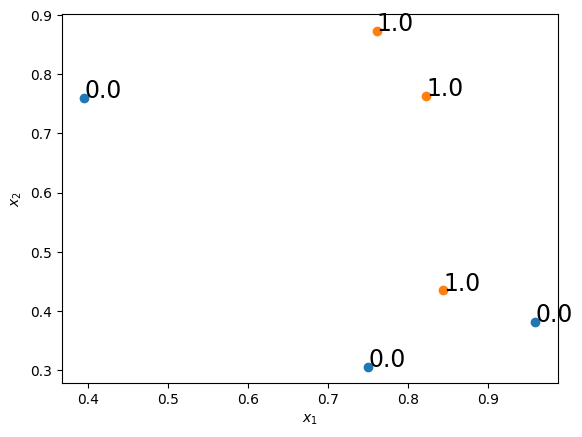

In [4]:
###################### 1.4.2 Data visualization ######################
# Plot data points with label = 0
neg_labels_idx = gt_Y[:, 0] == 0
plt.scatter(data_X[neg_labels_idx, 0], data_X[neg_labels_idx, 1])

# Plot data points with label = 1
pos_labels_idx = gt_Y[:, 0] == 1
plt.scatter(data_X[pos_labels_idx, 0], data_X[pos_labels_idx, 1])

# Annotate each point with its ground truth label
for i, txt in enumerate(gt_Y[:, 0]):
    plt.annotate(txt, data_X[i, 0:2], fontsize=17)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Converged in 1720 steps
Theta_optim_1 [[-0.64750524]
 [ 1.20611182]]
pred_Y [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]


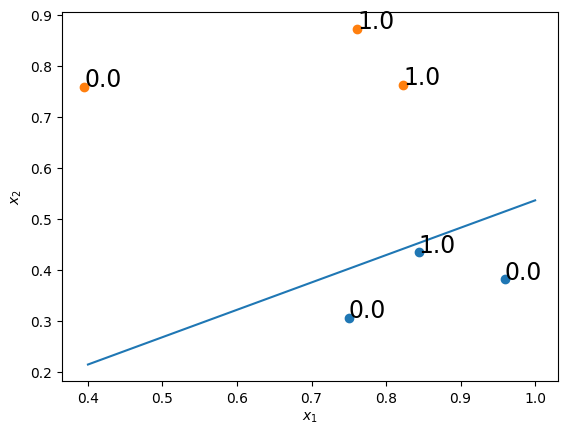

In [ ]:
###################### 1.4.3 Logistic regression ######################
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


# Probability P(Y=1|X), parameterized by Theta
def P(X, Theta):
    return np.clip(sigmoid(X @ Theta), 1e-3, 1 - 1e-3)


# Cross-entropy loss
def ce_loss(X, Theta, Y_true):
    return np.sum(
        -Y_true * np.log(P(X, Theta)) - (1.0 - Y_true) * np.log(1 - P(X, Theta))
    )


def d_ce_loss(X, Theta, Y_true):
    return np.sum(
        (P(X, Theta) - Y_true) * X, axis=0, keepdims=True
    ).T  # Output: column vector


# Probability to category
def prob2category(prob_ls, threshold=0.5):
    prob_ls = prob_ls.copy()
    prob_ls[prob_ls >= 0.5] = 1
    prob_ls[prob_ls < 0.5] = 0
    return prob_ls


# grad_descent
def grad_descent(obj_fn, grad_fn, alpha, is_converge, init_x, max_iters=100):
    # initialize x and x_lst
    x = init_x
    x_last = np.inf * np.ones_like(init_x)

    # Start gradient descent
    iters = 0
    while not is_converge(obj_fn(x_last), obj_fn(x)):
        x_last = x
        x = x - alpha * grad_fn(x)
        iters += 1
        if iters >= max_iters:
            print("Not converged in %s steps" % iters)
            return x

    print("Converged in %s steps" % iters)
    # Return optimal solution
    return x


def logistic_regress(X, Y, learning_rate=0.01):
    # Note that Theta should be in 2-dimensional real space
    Theta_0 = np.random.randn(X.shape[1], 1)

    def converge_criterion3(last, curr):
        return abs(last - curr) < 1e-5

    def obj_f(Theta):
        return ce_loss(X, Theta, Y)

    def d_obj_f(Theta):
        return d_ce_loss(X, Theta, Y)

    # Use gradient descent to find the best model
    Theta_optim = grad_descent(
        obj_f, d_obj_f, learning_rate, converge_criterion3, Theta_0, max_iters=10000
    )
    return Theta_optim


Theta_optim_1 = logistic_regress(data_X, gt_Y)
print("Theta_optim_1", Theta_optim_1)

prob_ls = P(data_X, Theta_optim_1)
pred_Y = prob2category(prob_ls)
print("pred_Y", pred_Y)

# Plot data points with label = 0
neg_labels_idx = pred_Y[:, 0] == 0
plt.scatter(data_X[neg_labels_idx, 0], data_X[neg_labels_idx, 1])

# Plot data points with label = 1
pos_labels_idx = pred_Y[:, 0] == 1
plt.scatter(data_X[pos_labels_idx, 0], data_X[pos_labels_idx, 1])

# Annotate each point with its ground truth label
for i, txt in enumerate(gt_Y[:, 0]):
    plt.annotate(txt, data_X[i, 0:2], fontsize=17)

# Draw decision boundary
range_x1 = np.linspace(0.4, 1, 100)


def lin_eq(x1):
    return -Theta_optim_1[0] * x1 / Theta_optim_1[1]


plt.plot(range_x1, lin_eq(range_x1))

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()